In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

Change the ticker for the stock you want to select along with the start and the end date

In [3]:
# Fetch data using Yahoo Finance
ticker = "HAL.NS"  # Example ticker - HAL.NS
start_date = "2024-04-01"
end_date = "2025-03-31"

data = yf.download(ticker, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Calculation for the ATR, Bollinger Bands and the Historical Volatility (Just run the script without modifications from here on)

In [4]:
# Calculate ATR (Average True Range)
data['High-Low'] = data['High'] - data['Low']
data['High-Close'] = abs(data['High'] - data['Close'].shift(1))
data['Low-Close'] = abs(data['Low'] - data['Close'].shift(1))
data['TrueRange'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
data['ATR'] = data['TrueRange'].rolling(window=14).mean()

In [5]:
# Calculate Bollinger Bands
data['20_SMA'] = data['Close'].rolling(window=20).mean()
data['20_STD'] = data['Close'].rolling(window=20).std()
data['UpperBand'] = data['20_SMA'] + (2 * data['20_STD'])
data['LowerBand'] = data['20_SMA'] - (2 * data['20_STD'])

In [6]:
# Calculate Historical Volatility (Annualized Standard Deviation)
data['Daily_Return'] = data['Close'].pct_change()
historical_volatility = data['Daily_Return'].std() * np.sqrt(252)

Suggested Plots

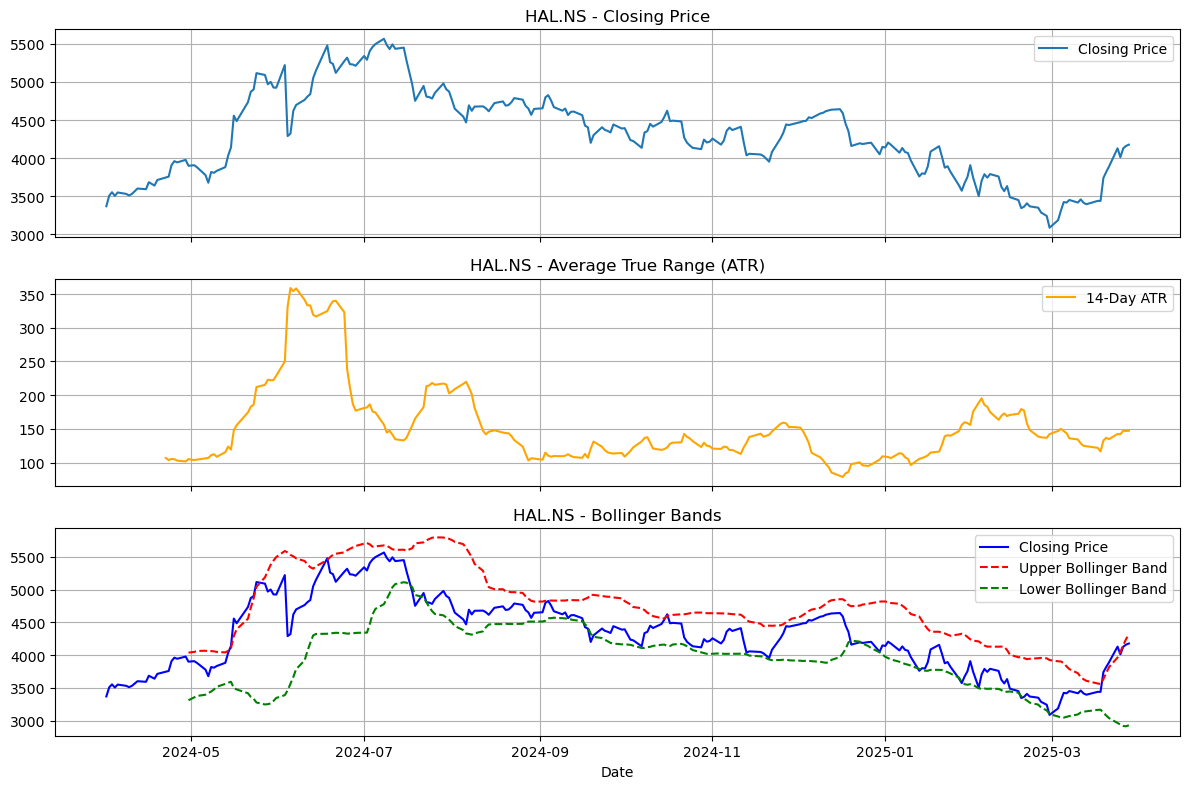

In [7]:
# Plot Price, ATR, and Bollinger Bands
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot Closing Price
axes[0].plot(data.index, data['Close'], label="Closing Price")
axes[0].set_title(f'{ticker} - Closing Price')
axes[0].legend()
axes[0].grid(True)

# Plot ATR
axes[1].plot(data.index, data['ATR'], label="14-Day ATR", color='orange')
axes[1].set_title(f'{ticker} - Average True Range (ATR)')
axes[1].legend()
axes[1].grid(True)

# Plot Bollinger Bands
axes[2].plot(data.index, data['Close'], label="Closing Price", color='blue')
axes[2].plot(data.index, data['UpperBand'], label="Upper Bollinger Band", color='red', linestyle='--')
axes[2].plot(data.index, data['LowerBand'], label="Lower Bollinger Band", color='green', linestyle='--')
axes[2].set_title(f'{ticker} - Bollinger Bands')
axes[2].legend()
axes[2].grid(True)
axes[2].set_xlabel("Date")

plt.tight_layout()
plt.show()

Calculations for the Average Volatility Percentages

In [8]:
# Prepare the 'Close' prices, ensuring it's a Series
close_prices_for_calc = data['Close']
if isinstance(close_prices_for_calc, pd.DataFrame):
    close_prices_for_calc = close_prices_for_calc.iloc[:, 0]

In [9]:
# 1. ATR % = (ATR / Current Price) * 100 for each day, then average
daily_atr_percent = (data['ATR'] / close_prices_for_calc.replace(0, np.nan)) * 100
data['ATR_Percent_Daily'] = daily_atr_percent # This should now work
average_atr_percentage_timeseries = data['ATR_Percent_Daily'].mean()
print(f'Average ATR % (over time series): {average_atr_percentage_timeseries:.2f}%')

Average ATR % (over time series): 3.50%


In [10]:
# 2. BB Width % = ((Upper Band - Lower Band) / Price) * 100 for each day, then average
bb_width_daily = (data['UpperBand'] - data['LowerBand']) / close_prices_for_calc.replace(0, np.nan)
data['BB_Width_Percent_Daily'] = bb_width_daily * 100
average_bb_width_percentage_timeseries = data['BB_Width_Percent_Daily'].mean()
print(f'Average Bollinger Band Width % (over time series): {average_bb_width_percentage_timeseries:.2f}%')

Average Bollinger Band Width % (over time series): 17.99%


In [11]:
# Print Historical Volatility
print(f'Historical Volatility (Annualized): {historical_volatility*100:.2f}%')

Historical Volatility (Annualized): 43.31%
